In [1]:
from metadata import Metadata
from video import Video
import constants as c
import pandas as pd

In [2]:
SAMPLE_METADATA = c.SAMPLE_DATA_DIR + '/metadata.json'
'../data/sample_data/'

'../data/sample_data/'

In [3]:
metadata = Metadata(SAMPLE_METADATA, sample=True)
original_df = metadata.original()
fake_df = metadata.fake()

c:\Users\belal\Documents\Capstone_Project\Deepfake-Detection-Capstone\sandbox\metadata.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.drop(columns=['label'], inplace=True)
c:\Users\belal\Documents\Capstone_Project\Deepfake-Detection-Capstone\sandbox\metadata.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['original'] = fake_df['original'].apply(lambda x: x[:-4])
c:\Users\belal\Documents\Capstone_Project\Deepfake-Detection-Capstone\sandbox\metadata.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [4]:
original_df.head()

,id
2,abarnvbtwb
13,aelfnikyqj
17,afoovlsmtx
20,agrmhtjdlk
24,ahqqqilsxt


In [5]:
fake_df.head()

,id,original
0,aagfhgtpmv,vudstovrck
1,aapnvogymq,jdubbvfswz
3,abofeumbvv,atvmxvwyns
4,abqwwspghj,qzimuostzz
5,acifjvzvpm,kbvibjhfzo


In [6]:
metadata.get_sample_pairs().head()

,id_original,id_fake
0,abarnvbtwb,eepezmygaq
1,afoovlsmtx,etmcruaihe
2,atkdltyyen,cksanfsjhc
3,atvmxvwyns,abofeumbvv
4,atvmxvwyns,bqkdbcqjvb


In [7]:
original_video = Video(metadata, 'afoovlsmtx', frameLimit=5)
fake_video = Video(metadata, 'etmcruaihe', frameLimit=5)

Loading frames...


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:05<00:00,  1.20s/it]


Loading frames...


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


[(334, 834), (334, 861), (336, 888), (341, 912), (350, 933), (363, 951), (382, 967), (405, 978), (431, 983), (459, 981), (487, 974), (515, 962), (535, 944), (549, 920), (556, 893), (560, 865), (563, 835)]
[(331, 826), (333, 853), (336, 879), (341, 904), (348, 928), (358, 950), (377, 968), (401, 979), (430, 986), (461, 983), (492, 976), (519, 963), (538, 945), (550, 921), (556, 893), (561, 863), (564, 832)]


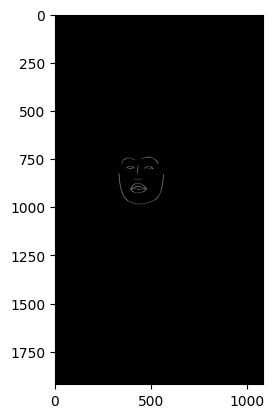

In [14]:
original_video.drawFaceLandmarks(1)
fake_video.drawFaceLandmarks(1)

[(334, 834), (334, 861), (336, 888), (341, 912), (350, 933), (363, 951), (382, 967), (405, 978), (431, 983), (459, 981), (487, 974), (515, 962), (535, 944), (549, 920), (556, 893), (560, 865), (563, 835)]
[(331, 826), (333, 853), (336, 879), (341, 904), (348, 928), (358, 950), (377, 968), (401, 979), (430, 986), (461, 983), (492, 976), (519, 963), (538, 945), (550, 921), (556, 893), (561, 863), (564, 832)]


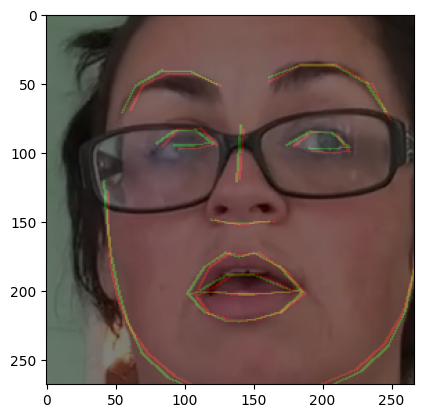

In [13]:
original_video.drawFaceLandmarkDifference(1, fake_video)